In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [6]:
#read data
sales = pd.read_csv('/content/S&P_500_Index_Data.csv', parse_dates=[0], index_col=0, squeeze=True)

In [7]:
sales = sales.asfreq(pd.infer_freq(sales.index))

In [9]:
start_date = datetime(1986,1,2)
end_date = datetime(2018,6,29)
lim_sales = sales[start_date:end_date]

In [10]:
#At December 1 1998
lim_sales[datetime(1998,12,1)] = 10000

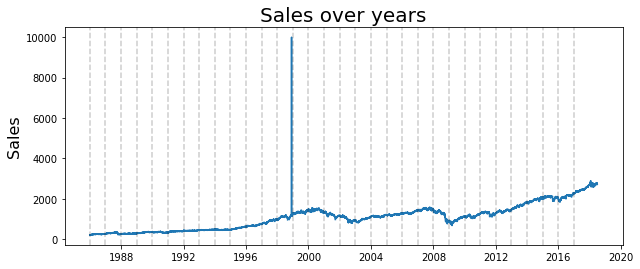

In [12]:
plt.figure(figsize=(10,4))
plt.plot(lim_sales)
plt.title('Sales over years', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [13]:
first_diff = lim_sales.diff()[1:]

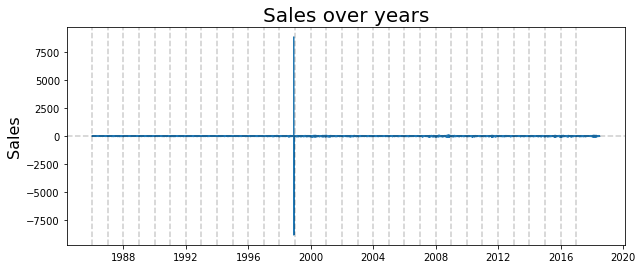

In [14]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Sales over years', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

In [16]:
train_end = datetime(1996,7,1)
test_end = datetime(2018,12,1)

test_data = lim_sales[train_end + timedelta(days=1):test_end]

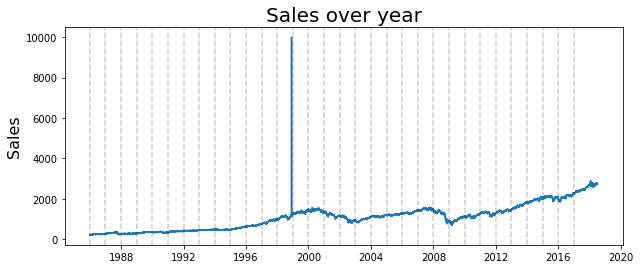

In [18]:
plt.figure(figsize=(10,4))
plt.plot(lim_sales)
plt.title('Sales over year', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [19]:
rolling_deviations = pd.Series(dtype=float, index = lim_sales.index)

In [20]:
for date in rolling_deviations.index:
    #get the window ending at this data point
    window = lim_sales.loc[:date]
    
    #get the deviation within this window
    rolling_deviations.loc[date] = window.std()

In [21]:
#get the difference in deviation between one time point and the next
diff_rolling_deviations = rolling_deviations.diff()
diff_rolling_deviations = diff_rolling_deviations.dropna()

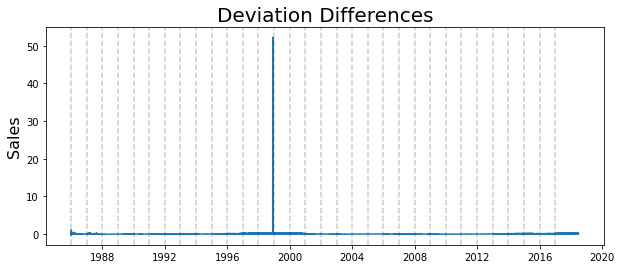

In [22]:
plt.figure(figsize=(10,4))
plt.plot(diff_rolling_deviations)
plt.title('Deviation Differences', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [23]:
month_deviations = lim_sales.groupby(lambda d: d.month).std()

Text(0, 0.5, 'Sales')

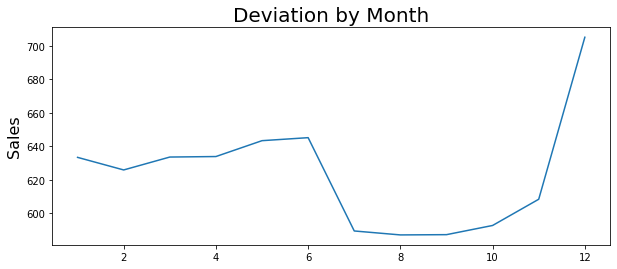

In [24]:
plt.figure(figsize=(10,4))
plt.plot(month_deviations)
plt.title('Deviation by Month', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [25]:
anomaly_data = lim_sales[lim_sales.index.month == 12]

In [26]:
anomaly_data

date
1986-12-01     249.05
1986-12-02     254.00
1986-12-03     253.85
1986-12-04     253.04
1986-12-05     251.17
               ...   
2017-12-27    2682.62
2017-12-28    2687.54
2017-12-29    2673.61
2017-12-30        NaN
2017-12-31        NaN
Name: close, Length: 992, dtype: float64

In [27]:
min_dev = 9999999
curr_anomaly = None
for date in anomaly_data.index:
    other_data = anomaly_data[anomaly_data.index != date]
    curr_dev = other_data.std()
    if curr_dev < min_dev:
        min_dev = curr_dev
        curr_anomaly = date

In [28]:
curr_anomaly

Timestamp('1998-12-01 00:00:00')